In [26]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt
import os, sys
import time
import pandas as pd
# Add the parent directory (one level up) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

import warnings
warnings.filterwarnings("ignore")

from modules.rectification.hard_negative_mining import sample_hard_negatives, load_predictions, load_annotation
from modules.inference import preprocessing, object_detection, nms


In [19]:
#open the predictions 
annotation_dir = '../storage/dataset'
prediction_dir = '../storage/data/dataset_predictions'

In [20]:
#prediction
prediction_paths = os.listdir(prediction_dir)
prediction_paths = [os.path.join(prediction_dir, p) for p in prediction_paths]
annotation_paths = [p.replace('_pred.txt', '.txt').replace('dataset_predictions', 'dataset') for p in prediction_paths]

In [24]:
#load both models
yolo_model1 = object_detection.Model()
yolo_model2 = object_detection.Model('../storage/models/yolo_model_2/yolov4-tiny-logistics_size_416_2.weights', 
                               '../storage/models/yolo_model_2/yolov4-tiny-logistics_size_416_2.cfg',
                               '../storage/models/yolo_model_2/logistics.names')

class_labels = yolo_model2.classes

### Sample hard negatives to analyize them ###

In [4]:
results = sample_hard_negatives(prediction_paths, annotation_paths, num_samples = 20, iou_threshold = 0.5)


### Looking at the hard negative images ###

In [21]:
#get image and bounding boxes
def load_image(image_dir):

    #bounding box dir
    bbox_dir = image_dir.replace('.jpg', '.txt')

    #laod image
    image = cv2.imread(image_dir)

    image_processed = cv2.dnn.blobFromImage(image,
                            scalefactor = 1/255.,
                            size = (416, 416),
                            mean = (0, 0, 0),
                            swapRB = True,
                            crop = False
        )

    return image_processed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 388.6445383010775


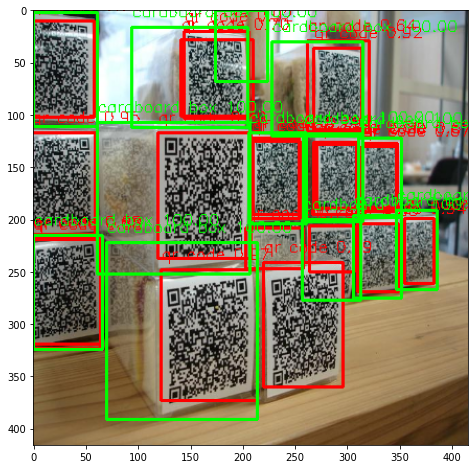

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 243.29021862325084


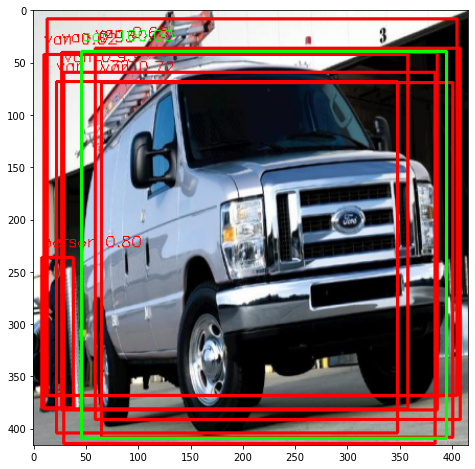

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 242.97749243364942


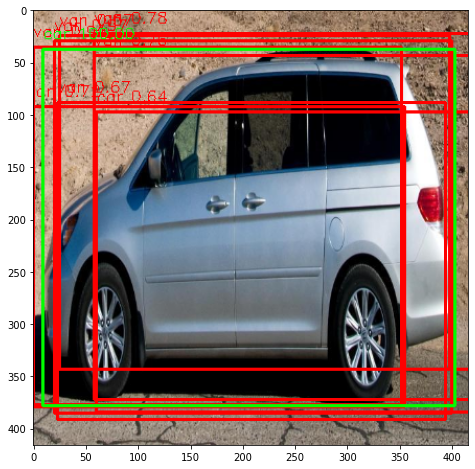

Total loss: 208.39498687325445


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


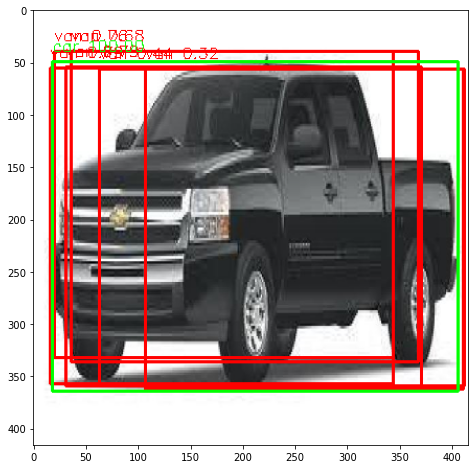

Total loss: 173.85101088612757


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


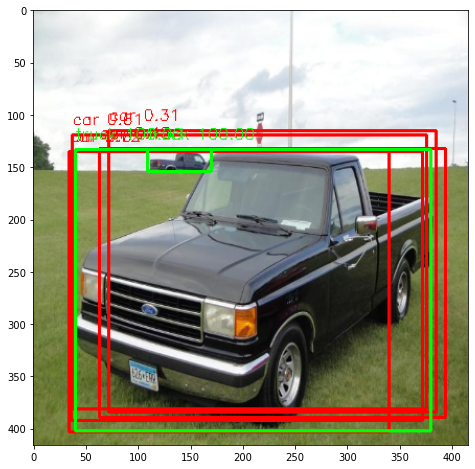

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 172.87228317196477


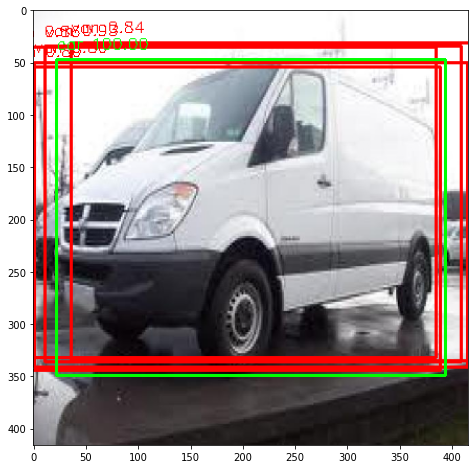

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 141.45697383369495


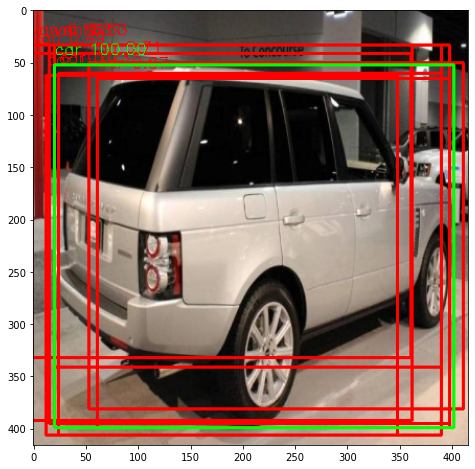

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 140.92034588152484


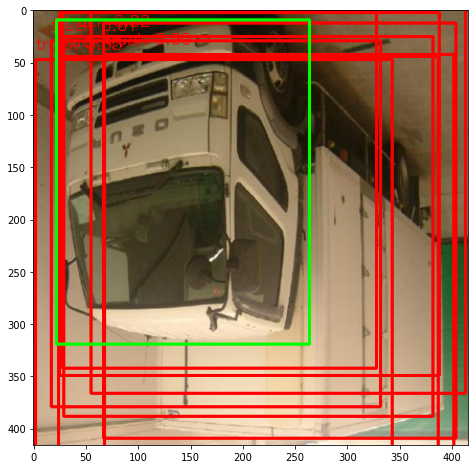

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 138.4565302899853


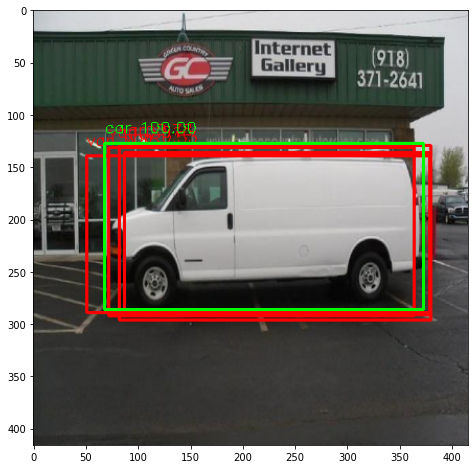

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 107.20823357960525


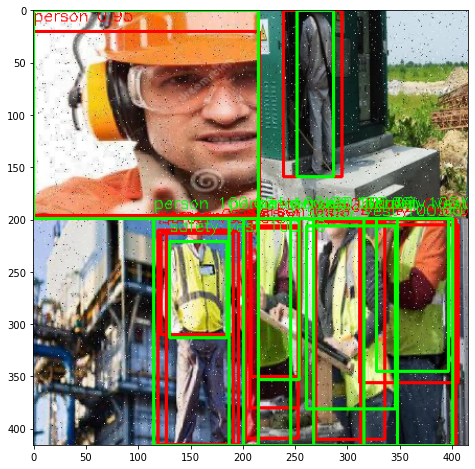

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 104.29773951618705


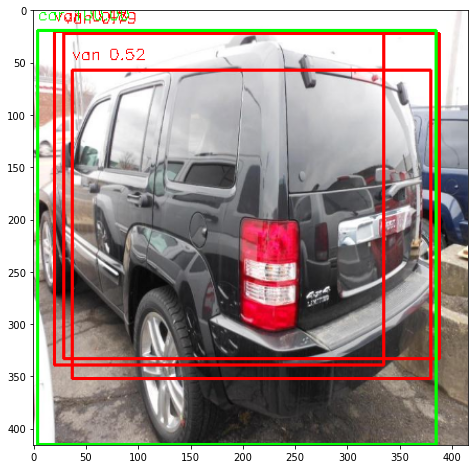

Total loss: 103.98753773642045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


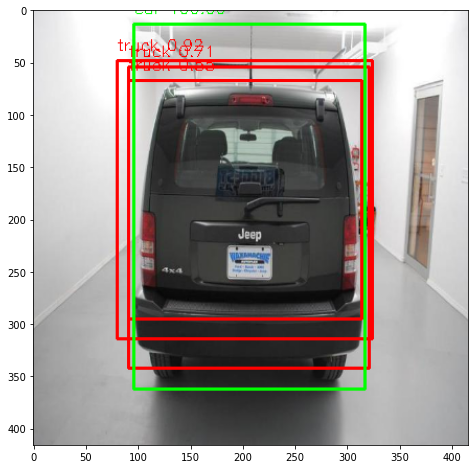

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 103.87252166738867


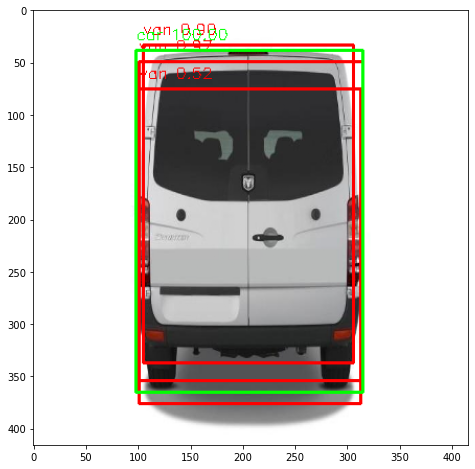

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 78.77444991008197


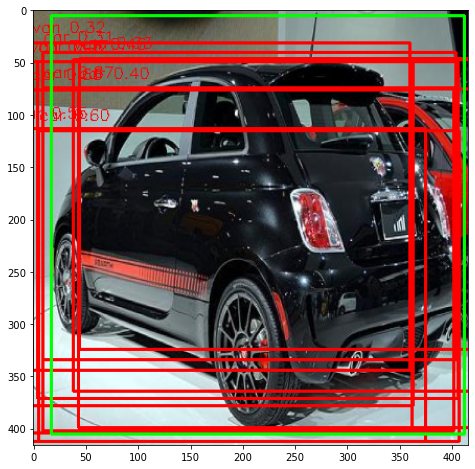

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 74.74560694284929


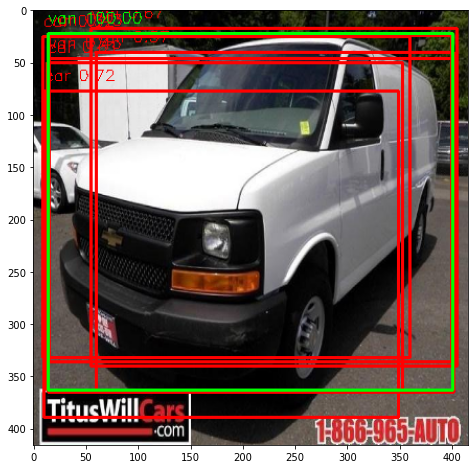

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 73.1292560834076


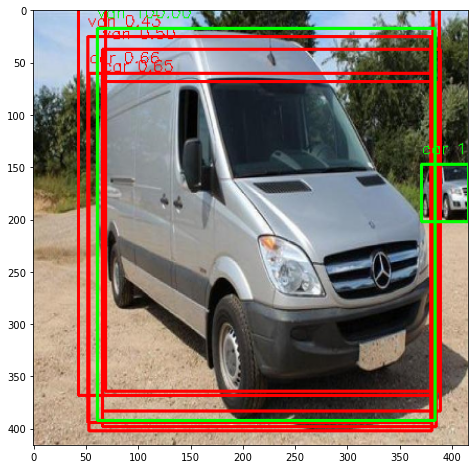

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 72.38971016326138


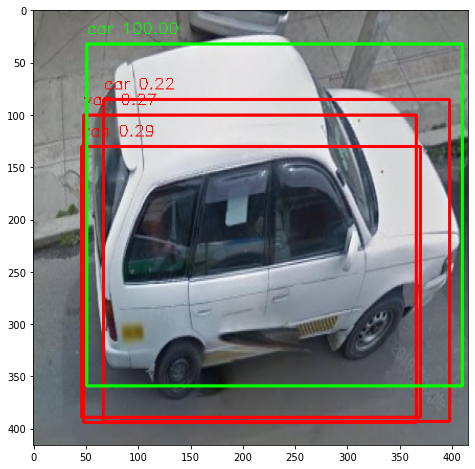

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 71.56385867363043


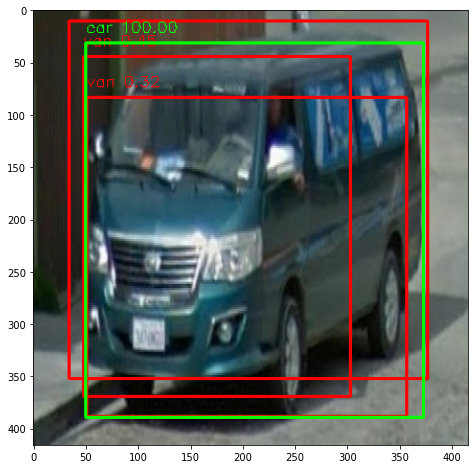

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 71.15136927831894


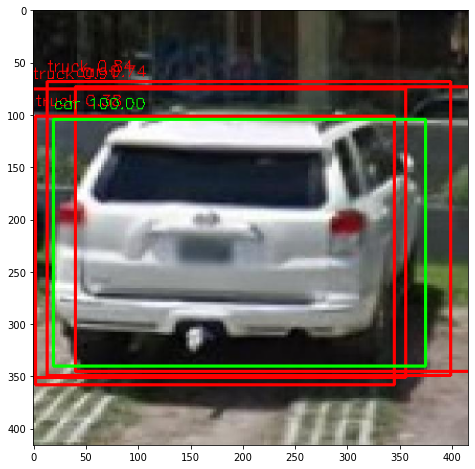

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total loss: 71.11410426447982


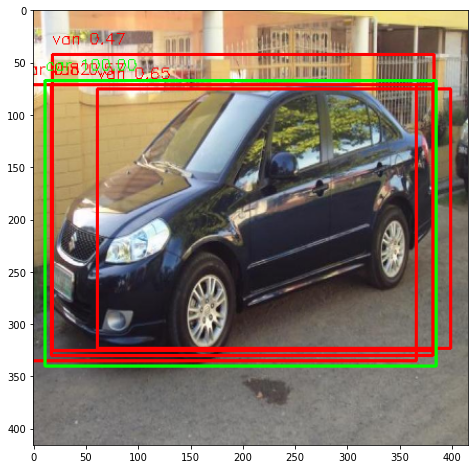

In [73]:
#load image
for res in results:
    #plot all images to visualize
    image_dir = res[0]
    loss, prediction_dir, annotation_dir = res[1]
    print(f"Total loss: {loss}")
    predictions = load_predictions(prediction_dir)
    pred_boxes = predictions[0]
    pred_cat = predictions[1]
    pred_scores = predictions[2]
    pred_confidence = [p[np.argmax(p)] for p in pred_scores]
    pred_labels = [class_labels[cat] for cat in pred_cat]

    #annotations
    annotations = load_annotation(annotation_dir)
    annot_boxes = annotations[0]
    annot_cat = annotations[1]
    annot_scores = [100 for _ in range(len(annot_cat))]
    annot_labels = [class_labels[cat] for cat in annot_cat]

    image = load_image(image_dir)
    image_trans = np.transpose(image[0], (1, 2, 0))
    image_trans = object_detection.draw_multiple_boxes(image_trans, pred_boxes, pred_confidence, pred_cat, pred_labels)
    image_trans = object_detection.draw_multiple_boxes(image_trans, annot_boxes, annot_scores, annot_cat, annot_labels,color = (0, 255, 0), )

    plt.figure(figsize = (8, 8))
    plt.imshow(image_trans)
    plt.show()

### ANALYSIS ###

1. Difficulties in Vehicle Type Identification: One of the key observations is that the model struggles to accurately classify the vehicle type in certain scenarios. This could be due to various factors such as occlusions, low image resolution, or subtle differences between vehicle types (e.g., a truck vs. a van). These cases are classified as "hard" samples for the model, meaning they significantly contribute to the overall loss and are challenging for the model to learn effectively.

- Feature Overlap: There may be significant overlap between the features of different vehicle types, making it difficult for the model to distinguish between similar-looking vehicles.
- Class Imbalance: It is possible that there are fewer instances of certain vehicle types in the dataset, which could lead to poor classification performance due to imbalanced learning.

2. Impact of Non-Maximum Suppression (NMS) Before Hard Mining: It was observed that performing Non-Maximum Suppression (NMS) before applying hard negative mining plays a crucial role in improving the performance of the mining strategy. NMS helps reduce redundancy by eliminating overlapping bounding boxes, ensuring that the same object is not counted multiple times.

- Increased Loss Without NMS: When NMS is not applied, the model evaluates a larger number of bounding boxes, including many redundant or highly overlapping boxes. As a result, the model's loss calculation is higher because it processes unnecessary boxes. This artificially inflates the loss and gives a misleading indication of how well the model is performing.
- Post-NMS Improvement: Applying NMS before hard mining reduces the number of false positives and redundant boxes, leading to a more accurate loss calculation and improved performance in detecting hard samples.

3. Loss Behavior with High Box Count: The loss calculation is heavily influenced by the number of boxes generated by the model. When there are many boxes, even if they are incorrect or overlapping, the loss increases due to the model having to process and compute loss for all of them. This highlights the importance of efficient box reduction techniques like NMS and improved anchor box generation to reduce the number of incorrect predictions before hard negative mining.

- Impact of High Box Count: When the model generates a large number of boxes, it leads to more "false" samples being considered for hard negative mining. These samples may overwhelm the learning process and cause the model to struggle in focusing on truly hard negatives.

4. Effect of Sampling Parameters: Different parameters in the hard negative mining strategy, such as the Intersection over Union (IoU) threshold or the number of samples to mine, can significantly impact which samples are classified as "hard" and thus prioritized for training.

- IoU Threshold: A lower IoU threshold might include more samples as "hard," but some of these could be noisy or irrelevant, increasing the overall loss without adding meaningful learning. On the other hand, a higher IoU threshold focuses on more accurate hard negatives but may limit the diversity of the samples, which can also be detrimental to the model’s learning.
- Mining Frequency: The frequency at which hard negative mining is applied during training (e.g., after every N iterations or epochs) can also influence the model's ability to converge. Mining too often may cause the model to overfit on hard negatives, while too infrequent mining may allow it to miss valuable learning opportunities.


5. Class-specific Challenges: The analysis also reveals that certain classes of objects are inherently harder for the model to detect and classify correctly. These "hard" classes can be influenced by factors such as:

- Visual complexity of the class: Objects with complex shapes, textures, or occlusions are harder to classify.
Dataset limitations: The dataset may contain fewer samples of certain classes, leading to poor representation and harder learning for the model.